<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [7]:
# insert code here

X=diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
type(X)

numpy.ndarray

In [9]:
X.shape

(442, 10)

In [11]:
y=diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [12]:
type(y)

numpy.ndarray

In [13]:
y.shape

(442,)

### Split the data (training/test)

In [16]:
# insert code here

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
X_test.shape

(89, 10)

### Create the model's architecture

In [37]:
# insert code here
model=Sequential() ### Create a base model then keep on addding layers

In [38]:
## First layer
model.add(Dense(20, activation='relu', input_dim=10))

In [39]:
## Second layer
model.add(Dense(10, activation='relu'))

In [40]:
## Third layer
model.add(Dense(5, activation='relu'))

In [41]:
## Output layer
model.add(Dense(1,activation='linear'))

activation is linear because we want  to predict a continuous output data, Sodtmax is used when there is multi-class.

In [42]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [43]:
model.compile(optimizer='adam', loss='mse', metrics= ['mse'])

### Fit the training data

we need to split the data one more time to validation set because to evaluate the perfomance of the model and prevent overfitting.

In [44]:
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [45]:
%%time
# insert code here
history = model.fit(X_train2,y_train2,validation_split = 0.25,batch_size = 10,epochs = 1000,verbose = 0)

Wall time: 2min 24s


### Create predictions

In [46]:
# insert code here
predictions= model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


### Evaluate the model

In [47]:
# insert code here
score= model.evaluate(X_test,y_test)
print('Test Loss',score[0])

3/3 [==============================] - 0s 9ms/step - loss: 2958.6145 - mse: 2958.6145
Test Loss 2958.614501953125


In [48]:
score

[2958.614501953125, 2958.614501953125]

### Visualisation of cost

In [49]:
# insert code here
history.history

{'loss': [28935.791015625,
  28858.029296875,
  28722.40625,
  28495.1484375,
  28117.3828125,
  27508.4921875,
  26593.84765625,
  25303.59765625,
  23540.876953125,
  21241.958984375,
  18435.33203125,
  15208.2412109375,
  11969.3330078125,
  9030.1513671875,
  6829.15283203125,
  5470.8388671875,
  4787.0703125,
  4478.18505859375,
  4329.75146484375,
  4240.1953125,
  4158.62353515625,
  4083.68359375,
  4017.34326171875,
  3953.92138671875,
  3906.346923828125,
  3834.349365234375,
  3802.2158203125,
  3734.971923828125,
  3690.90478515625,
  3649.480712890625,
  3606.174560546875,
  3569.210205078125,
  3531.935302734375,
  3502.11083984375,
  3493.43701171875,
  3446.0205078125,
  3410.42578125,
  3378.941650390625,
  3351.14111328125,
  3324.07177734375,
  3301.6171875,
  3281.952880859375,
  3259.680419921875,
  3233.48583984375,
  3215.236572265625,
  3195.442138671875,
  3176.26220703125,
  3155.486572265625,
  3141.07470703125,
  3124.867431640625,
  3110.209716796875,
  3

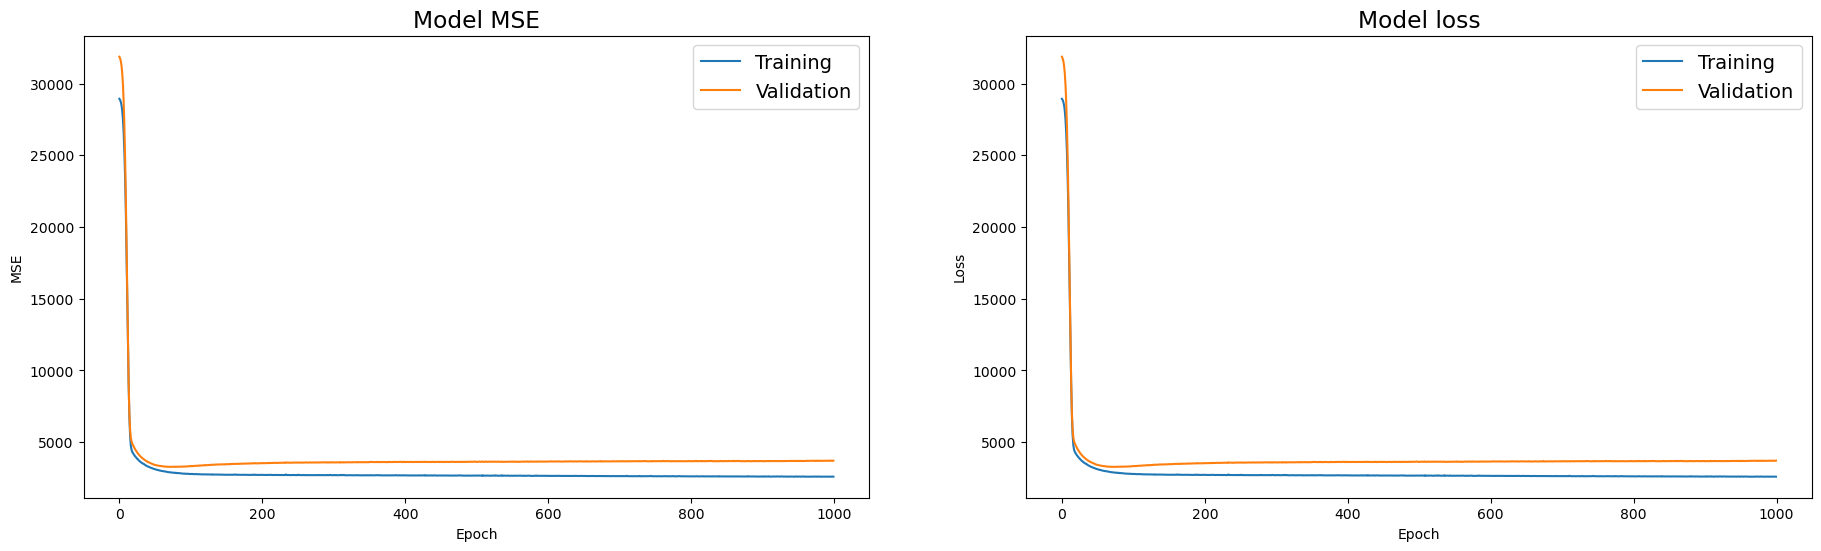

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [53]:
# insert code here

# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

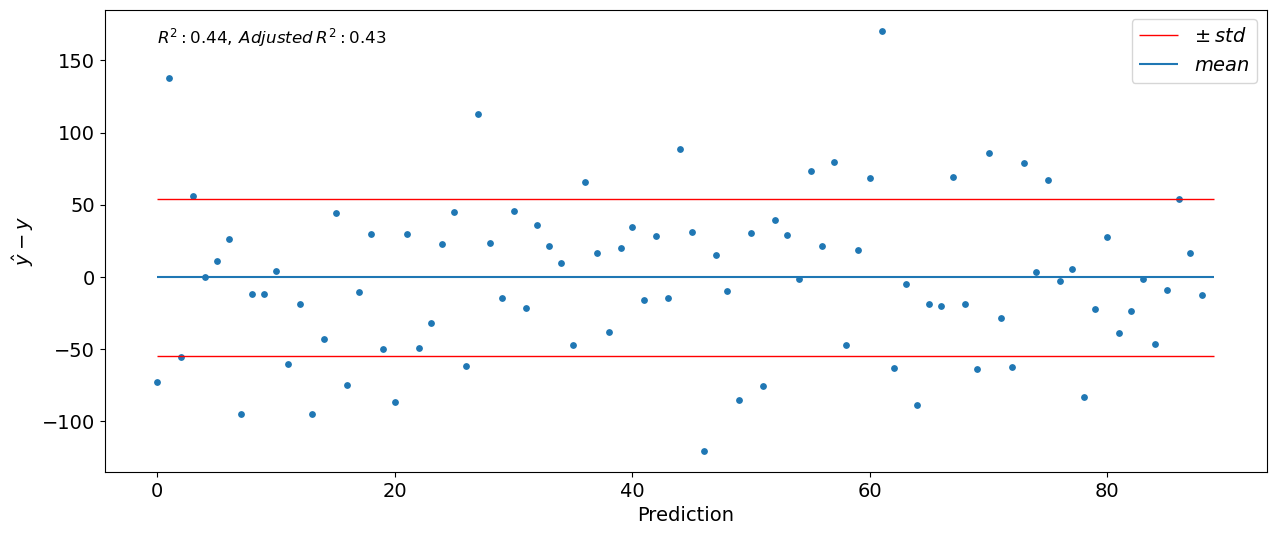

In [54]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



